In [160]:
import pandas as pd
import numpy as np
import pandas_profiling
import scipy.stats as stats

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [163]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [164]:
data_normal=pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_Normal.csv")

In [165]:
data_normal['attack']='normal'

In [166]:
data_normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,normal


In [167]:
data_smurf = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_Smurf.csv")

In [168]:
data_smurf["attack"]="smurf"

In [169]:
data_satan = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_Satan.csv")

In [170]:
data_satan["attack"]="satan"

In [171]:
data_rootkit = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_RootKit.csv")

In [172]:
data_rootkit["attack"]="rootkit"

In [173]:
data_portsweep = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_PortSweep.csv")

In [174]:
data_portsweep["attack"]="portsweep"

In [175]:
data_neptune = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_Neptune.csv")

In [176]:
data_neptune["attack"]="neptune"

In [177]:
data_nmap = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_NMap.csv")

In [178]:
data_nmap["attack"]="nmap"

In [179]:
data_guesspassword = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_GuessPassword.csv")

In [180]:
data_guesspassword["attack"]="guesspassword"

In [181]:
data_ftpwrite = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_FTPWrite.csv")

In [182]:
data_ftpwrite["attack"]="ftpwrite"

In [183]:
data_buffer = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back_BufferOverflow.csv")

In [184]:
data_buffer["attack"]="buffer"

In [185]:
data_back = pd.read_csv(r"C:\Users\Dell\Downloads\New folder (2)\Data_of_Attack_Back.csv")

In [186]:
data_back["attack"]="Back"

In [187]:
data_all = pd.concat([data_buffer,data_ftpwrite,data_guesspassword,data_neptune,data_nmap,data_normal,data_portsweep,data_rootkit,data_satan,data_smurf,data_back])

In [188]:
data_all

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.003,0.1,0.0,0.100,0.067,0.000,0.000,0.000,0.000,buffer
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.004,0.1,0.0,0.050,0.050,0.000,0.000,0.000,0.000,buffer
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.001,0.1,0.0,0.100,0.000,0.000,0.000,0.000,0.000,buffer
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.001,0.1,0.0,0.100,0.000,0.000,0.000,0.000,0.000,buffer
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.002,0.1,0.0,0.050,0.000,0.000,0.000,0.000,0.000,buffer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.096,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back
964,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.097,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back
965,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.098,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back
966,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.099,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back


In [189]:
data_all.columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","counts","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]
data_all.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.003,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,buffer
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.004,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,buffer
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,buffer
5,0.0113,0.0,0.05,0.0,0.06274,0.16771,0,0.0,0.0,0.5,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
6,0.0053,0.0,0.05,0.0,0.02628,0.03860,0,0.0,0.0,0.3,...,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,buffer
7,0.0000,0.0,0.14,0.0,0.00000,0.05690,0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
8,0.0000,0.0,0.14,0.0,0.00000,0.05828,0,0.0,0.0,0.0,...,0.002,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer
9,0.0000,0.0,0.14,0.0,0.00000,0.05020,0,0.0,0.0,0.0,...,0.003,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,buffer


In [190]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13  ro

In [191]:
data_all["attack_type"] = np.where(data_all.attack=="normal",0,1)

In [192]:
data_all.attack

0      buffer
1      buffer
2      buffer
3      buffer
4      buffer
        ...  
963      Back
964      Back
965      Back
966      Back
967      Back
Name: attack, Length: 817551, dtype: object

In [193]:
DOS=["back","land","neptune","pod","smurf","teardrop","apache2","udpstorm","processtable","worm"]
Probe=["satan","ipsweep","nmap","portsweep","mscan","saint"]
R2L=["guesspassword","ftpwrite","imap","phf","multihop","warezmaster","warezclient","spy","xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named"]
U2R=["buffer","loadmodule","rootkit","perl","sqlattack","xterm","ps"]

In [194]:
def Attack_class(x):
    if(x in DOS):
        return "DOS"
    elif(x in Probe):
        return "Probe"
    elif(x in R2L):
        return "R2L"
    elif(x in U2R):
        return "U2R"
    else:
        return "normal"

In [195]:
data_all.attack.unique()

array(['buffer', 'ftpwrite', 'guesspassword', 'neptune', 'nmap', 'normal',
       'portsweep', 'rootkit', 'satan', 'smurf', 'Back'], dtype=object)

In [196]:
data_all["attack_class"]=data_all.attack.apply(Attack_class)

In [197]:
data_all


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_type,attack_class
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.0,0.100,0.067,0.000,0.000,0.000,0.000,buffer,1,U2R
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.0,0.050,0.050,0.000,0.000,0.000,0.000,buffer,1,U2R
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.0,0.100,0.000,0.000,0.000,0.000,0.000,buffer,1,U2R
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.0,0.100,0.000,0.000,0.000,0.000,0.000,buffer,1,U2R
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.0,0.050,0.000,0.000,0.000,0.000,0.000,buffer,1,U2R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back,1,normal
964,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back,1,normal
965,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back,1,normal
966,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.0,0.001,0.000,0.001,0.001,0.001,0.001,Back,1,normal


In [198]:
data_all["attack_class"].unique()

array(['U2R', 'R2L', 'DOS', 'Probe', 'normal'], dtype=object)

In [199]:
data_all.drop("attack", inplace=True, axis=1)

In [200]:
data_all

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_class
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.1,0.0,0.100,0.067,0.000,0.000,0.000,0.000,1,U2R
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.1,0.0,0.050,0.050,0.000,0.000,0.000,0.000,1,U2R
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.1,0.0,0.100,0.000,0.000,0.000,0.000,0.000,1,U2R
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.1,0.0,0.100,0.000,0.000,0.000,0.000,0.000,1,U2R
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.1,0.0,0.050,0.000,0.000,0.000,0.000,0.000,1,U2R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,1,normal
964,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,1,normal
965,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,1,normal
966,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.001,0.000,0.001,0.001,0.001,0.001,1,normal


In [201]:
#profile_report_cyber = pandas_profiling.ProfileReport(data_all)
#profile_report_cyber.to_file('profile_report_cyber.html')

In [202]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13  ro

In [203]:
delete_fields = ["num_outbound_cmds","land","num_compromised","serror_rate","srv_serror_rate","srv_rerror_rate","same_srv_rate","rerror_rate","srv_rerror_rate","dst_host_serror_rate","dst_host_rerror_rate","dst_host_same_srv_rate","is_guest_login","wrong_fragment"]

In [204]:
data_all.drop(delete_fields,inplace=True,axis=1)

In [205]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   urgent                       817551 non-null  float64
 7   hot                          817551 non-null  float64
 8   num_failed_logins            817551 non-null  float64
 9   logged_in                    817551 non-null  float64
 10  root_shell                   817551 non-null  float64
 11  su_attempted                 817551 non-null  float64
 12  num_root                     817551 non-null  float64
 13  nu

In [206]:
delete_skewed_fields = ["src_bytes",
                        "duration",
                        "hot",
                       "num_failed_logins",
                       "num_root",
                       "num_file_creations",
                       "num_access_files"]

In [207]:
data_all.drop(delete_skewed_fields, inplace=True, axis=1)

In [208]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                817551 non-null  float64
 1   service                      817551 non-null  float64
 2   flag                         817551 non-null  float64
 3   dst_bytes                    817551 non-null  float64
 4   urgent                       817551 non-null  float64
 5   logged_in                    817551 non-null  float64
 6   root_shell                   817551 non-null  float64
 7   su_attempted                 817551 non-null  float64
 8   num_shells                   817551 non-null  float64
 9   is_host_login                817551 non-null  float64
 10  counts                       817551 non-null  float64
 11  srv_count                    817551 non-null  float64
 12  diff_srv_rate                817551 non-null  float64
 13  sr

In [209]:
data_all.attack_type.value_counts()

0    576710
1    240841
Name: attack_type, dtype: int64

In [210]:
data_all.flag.value_counts()

0.00    570819
0.07    202685
0.05     38579
0.06      2541
0.08      2020
0.02       331
0.10       298
0.09       122
0.01        97
0.04        40
0.03        19
Name: flag, dtype: int64

In [211]:
data_all.urgent.value_counts()

0.0    817539
0.1         7
0.2         3
0.5         1
0.3         1
Name: urgent, dtype: int64

In [212]:
data_all.logged_in.value_counts()

0.1    521695
0.0    295856
Name: logged_in, dtype: int64

In [213]:
data_all.su_attempted.value_counts()

0.0    817496
0.2        36
0.1        19
Name: su_attempted, dtype: int64

In [214]:
data_all.root_shell.value_counts()

0.0    817300
0.1       251
Name: root_shell, dtype: int64

In [215]:
data_all.num_shells.value_counts()

0.0    817391
0.1       159
0.2         1
Name: num_shells, dtype: int64

In [216]:
data_all.is_host_login.value_counts()
#is_host_login

0.0    817550
0.1         1
Name: is_host_login, dtype: int64

In [217]:
data_all.protocol_type.value_counts()

0.00    776566
0.01     35402
0.02      5583
Name: protocol_type, dtype: int64

In [218]:
conv_to_obj = ["protocol_type",
            
             "urgent",
             "logged_in",
             "root_shell",
             "su_attempted",
             "num_shells",
             "is_host_login",
            "flag",
             "attack_type",
             ]

In [219]:
data_all[conv_to_obj]=data_all[conv_to_obj].astype(object)

In [220]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                817551 non-null  object 
 1   service                      817551 non-null  float64
 2   flag                         817551 non-null  object 
 3   dst_bytes                    817551 non-null  float64
 4   urgent                       817551 non-null  object 
 5   logged_in                    817551 non-null  object 
 6   root_shell                   817551 non-null  object 
 7   su_attempted                 817551 non-null  object 
 8   num_shells                   817551 non-null  object 
 9   is_host_login                817551 non-null  object 
 10  counts                       817551 non-null  float64
 11  srv_count                    817551 non-null  float64
 12  diff_srv_rate                817551 non-null  float64
 13  sr

In [221]:
binary_data=data_all[data_all.columns.difference(["attack_class"])]

In [222]:
cat_var_binary=["attack_type",

"is_host_login",

"logged_in",
"flag",

"num_shells",
"root_shell",
"su_attempted",
"urgent",

"protocol_type"]

In [223]:
#dividing categorical and numerical variables
data_cat_binary=binary_data[cat_var_binary]
data_num_binary=binary_data[binary_data.columns.difference(cat_var_binary)]

In [224]:
data_cat_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   attack_type    817551 non-null  object
 1   is_host_login  817551 non-null  object
 2   logged_in      817551 non-null  object
 3   flag           817551 non-null  object
 4   num_shells     817551 non-null  object
 5   root_shell     817551 non-null  object
 6   su_attempted   817551 non-null  object
 7   urgent         817551 non-null  object
 8   protocol_type  817551 non-null  object
dtypes: object(9)
memory usage: 62.4+ MB


In [225]:
data_num_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   counts                       817551 non-null  float64
 1   diff_srv_rate                817551 non-null  float64
 2   dst_bytes                    817551 non-null  float64
 3   dst_host_count               817551 non-null  float64
 4   dst_host_diff_srv_rate       817551 non-null  float64
 5   dst_host_same_src_port_rate  817551 non-null  float64
 6   dst_host_srv_count           817551 non-null  float64
 7   dst_host_srv_diff_host_rate  817551 non-null  float64
 8   dst_host_srv_rerror_rate     817551 non-null  float64
 9   dst_host_srv_serror_rate     817551 non-null  float64
 10  service                      817551 non-null  float64
 11  srv_count                    817551 non-null  float64
 12  srv_diff_host_rate           817551 non-null  float64
dtypes:

In [226]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [227]:
data_num_binary=data_num_binary.apply(lambda x:outlier_capping(x))

In [228]:
data_cat_binary= pd.get_dummies(data_cat_binary,drop_first=True)

In [229]:
data_cat_binary= pd.get_dummies(data_cat_binary,drop_first=True)

In [230]:
data_binary=pd.concat([data_num_binary,data_cat_binary],axis=1)

In [231]:
data_binary

,counts,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,...,num_shells_0.2,root_shell_0.1,su_attempted_0.1,su_attempted_0.2,urgent_0.1,urgent_0.2,urgent_0.3,urgent_0.5,protocol_type_0.01,protocol_type_0.02
0,0.001,0.0,0.02957,0.001,0.0,0.100,0.003,0.018,0.000,0.000,...,0,1,0,0,0,0,0,0,0,0
1,0.001,0.0,0.02766,0.002,0.0,0.050,0.004,0.018,0.000,0.000,...,0,1,0,0,0,0,0,0,0,0
2,0.001,0.0,0.06707,0.001,0.0,0.100,0.001,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
3,0.001,0.0,0.04551,0.001,0.0,0.100,0.001,0.000,0.000,0.000,...,0,1,0,0,0,0,0,0,0,0
4,0.001,0.0,0.03095,0.002,0.0,0.050,0.002,0.000,0.000,0.000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.004,0.0,0.08314,0.096,0.0,0.001,0.096,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,0
964,0.004,0.0,0.08314,0.097,0.0,0.001,0.097,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,0
965,0.003,0.0,0.08314,0.098,0.0,0.001,0.098,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,0
966,0.003,0.0,0.08314,0.099,0.0,0.001,0.099,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,0


In [232]:
import seaborn as sns

<AxesSubplot:>

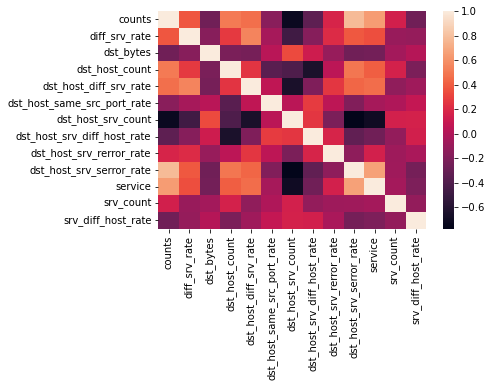

In [233]:
#corelation matrix
sns.heatmap(data_num_binary.corr())

<AxesSubplot:>

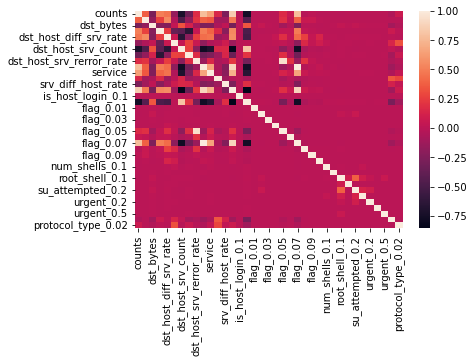

In [234]:
sns.heatmap(data_binary.corr())

In [235]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   counts                       817551 non-null  float64
 1   diff_srv_rate                817551 non-null  float64
 2   dst_bytes                    817551 non-null  float64
 3   dst_host_count               817551 non-null  float64
 4   dst_host_diff_srv_rate       817551 non-null  float64
 5   dst_host_same_src_port_rate  817551 non-null  float64
 6   dst_host_srv_count           817551 non-null  float64
 7   dst_host_srv_diff_host_rate  817551 non-null  float64
 8   dst_host_srv_rerror_rate     817551 non-null  float64
 9   dst_host_srv_serror_rate     817551 non-null  float64
 10  service                      817551 non-null  float64
 11  srv_count                    817551 non-null  float64
 12  srv_diff_host_rate           817551 non-null  float64
 13  at

In [236]:
data_binary.rename(columns = {"flag_0.01" : "flag_01","flag_0.02":"flag_02","flag_0.03":"flag_03","flag_0.04":"flag_04",
                             "flag_0.05":"flag_05","flag_0.06":"flag_06","flag_0.07":"flag_07","flag_0.08":"flag_08",
                             "flag_0.09":"flag_09","flag_0.1":"flag_1","su_attempted_0.1":"su_attempted_1","su_attempted_0.2":"su_attempted_2",
                              "urgent_0.1":"urgent_1","urgent_0.2":"urgent_2","urgent_0.3":"urgent_3",
                              "urgent_0.5":"urgent_5","protocol_type_0.01":"protocol_type_1","protocol_type_0.02":"protocol_type_2",
                             "num_shells_0.1":"num_shells_1","num_shells_0.2":"num_shells_2","is_host_login_0.1":"is_host_login_1",
                             "logged_in_0.1":"logged_in_1","root_shell_0.1":"root_shell_1" },inplace=True)

In [237]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 967
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   counts                       817551 non-null  float64
 1   diff_srv_rate                817551 non-null  float64
 2   dst_bytes                    817551 non-null  float64
 3   dst_host_count               817551 non-null  float64
 4   dst_host_diff_srv_rate       817551 non-null  float64
 5   dst_host_same_src_port_rate  817551 non-null  float64
 6   dst_host_srv_count           817551 non-null  float64
 7   dst_host_srv_diff_host_rate  817551 non-null  float64
 8   dst_host_srv_rerror_rate     817551 non-null  float64
 9   dst_host_srv_serror_rate     817551 non-null  float64
 10  service                      817551 non-null  float64
 11  srv_count                    817551 non-null  float64
 12  srv_diff_host_rate           817551 non-null  float64
 13  at

In [238]:
data_binary.attack_type_1

0      1
1      1
2      1
3      1
4      1
      ..
963    1
964    1
965    1
966    1
967    1
Name: attack_type_1, Length: 817551, dtype: uint8

In [239]:
#variable reduction/feature selection

In [240]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
#now need to calculate the accuracy
from sklearn.metrics import roc_auc_score

In [241]:
#univariate regression
uni_df = []

for var in data_binary.columns.difference(['attack_type_1']):
    model = smf.logit(str('attack_type_1~')+str(var),data = data_binary).fit()
    somerced = 2*roc_auc_score(data_binary.attack_type_1,model.predict(data_binary)) - 1
    uni_df.append(somerced)

Optimization terminated successfully.
         Current function value: 0.144329
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.322256
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302277
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.402241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.596197
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.148216
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.451424
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.584505
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.175255

In [242]:
uni_df = pd.concat([pd.Series(data_binary.columns.difference(['attack_type_1'])),pd.Series(uni_df)],axis=1)

In [243]:
uni_df

,0,1
0,counts,9.451431e-01
1,diff_srv_rate,9.504044e-01
2,dst_bytes,9.238893e-01
3,dst_host_count,6.630530e-01
4,dst_host_diff_srv_rate,9.039135e-01
5,dst_host_same_src_port_rate,5.914671e-01
6,dst_host_srv_count,9.606460e-01
7,dst_host_srv_diff_host_rate,6.106087e-01
8,dst_host_srv_rerror_rate,8.825283e-02
9,dst_host_srv_serror_rate,8.354949e-01


In [244]:
uni_df.columns = ['feature','gini']
imp_vars_uni_df = uni_df.sort_values(by='gini',ascending=False).head(20)

In [245]:
imp_vars_uni = list(imp_vars_uni_df.feature.values)
imp_vars_uni

['dst_host_srv_count',
 'diff_srv_rate',
 'counts',
 'service',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'logged_in_1',
 'flag_07',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_src_port_rate',
 'srv_diff_host_rate',
 'flag_05',
 'dst_host_srv_rerror_rate',
 'protocol_type_1',
 'protocol_type_2',
 'flag_06',
 'flag_08',
 'flag_1']

In [251]:
#select KBest
from sklearn.feature_selection import SelectKBest, f_classif

SKB = SelectKBest(f_classif,k=20).fit(X,Y)
X.columns[SKB.get_support()].values

array(['counts', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_count', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'flag_05',
       'flag_06', 'flag_07', 'flag_08', 'flag_1', 'logged_in_1',
       'protocol_type_1', 'protocol_type_2', 'service',
       'srv_diff_host_rate'], dtype=object)

In [252]:
imp_var_SKB = list(X.columns[SKB.get_support()])
imp_var_SKB

['counts',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag_05',
 'flag_06',
 'flag_07',
 'flag_08',
 'flag_1',
 'logged_in_1',
 'protocol_type_1',
 'protocol_type_2',
 'service',
 'srv_diff_host_rate']

In [254]:
Final_list = list(set(imp_var_SKB + imp_vars_uni ))
Final_list

['dst_host_srv_serror_rate',
 'flag_05',
 'dst_host_same_src_port_rate',
 'protocol_type_1',
 'counts',
 'protocol_type_2',
 'dst_host_diff_srv_rate',
 'dst_host_srv_rerror_rate',
 'service',
 'logged_in_1',
 'flag_06',
 'flag_1',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'srv_diff_host_rate',
 'diff_srv_rate',
 'flag_07',
 'flag_08',
 'dst_bytes',
 'dst_host_srv_count']

In [255]:
X = data_binary[Final_list]

In [256]:
X.columns

Index(['dst_host_srv_serror_rate', 'flag_05', 'dst_host_same_src_port_rate',
       'protocol_type_1', 'counts', 'protocol_type_2',
       'dst_host_diff_srv_rate', 'dst_host_srv_rerror_rate', 'service',
       'logged_in_1', 'flag_06', 'flag_1', 'dst_host_count',
       'dst_host_srv_diff_host_rate', 'srv_diff_host_rate', 'diff_srv_rate',
       'flag_07', 'flag_08', 'dst_bytes', 'dst_host_srv_count'],
      dtype='object')

In [257]:
#Information Value calculation
def calculate_woe_iv(dataset,feature,target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value':val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good']  = dset['Good']/dset['Good'].sum()
    dset['Distr_Bad']  = dset['Bad']/dset['Bad'].sum()
    dset['WOE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'] )
    dset = dset.replace({'WOE' :{np.inf:0,-np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad'])*dset['WOE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WOE')
    return dset,iv

In [258]:
for col in data_binary:
    if col == 'attack_type_1': continue
    else:
        print('WOE and IV for column: {}'.format(col))
        df,iv = calculate_woe_iv(data_binary,col,'attack_type_1')
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WOE and IV for column: counts
IV score: 7.05


WOE and IV for column: diff_srv_rate
IV score: 10.59


WOE and IV for column: dst_bytes
IV score: 2.67


WOE and IV for column: dst_host_count
IV score: 3.22


WOE and IV for column: dst_host_diff_srv_rate
IV score: 6.46


WOE and IV for column: dst_host_same_src_port_rate
IV score: 2.66


WOE and IV for column: dst_host_srv_count
IV score: 7.44


WOE and IV for column: dst_host_srv_diff_host_rate
IV score: 4.73


WOE and IV for column: dst_host_srv_rerror_rate
IV score: 0.37


WOE and IV for column: dst_host_srv_serror_rate
IV score: 10.56


WOE and IV for column: service
IV score: 12.59


WOE and IV for column: srv_count
IV score: 0.75


WOE and IV for column: srv_diff_host_rate
IV score: 1.82


WOE and IV for column: is_host_login_1
IV score: 0.00


WOE and IV for column: logged_in_1
IV score: 6.86


WOE and IV for column: flag_01
IV score: 0.00


WOE and IV for column: flag_02
IV score: 0.00


WOE and IV for column: flag_03
IV score: 0

In [259]:
imp_var_iv=["dst_host_srv_rerror_rate",
"srv_count",
"protocol_type_1",
"flag_05",
"flag_06",
"flag_08",
"srv_diff_host_rate"]

In [260]:
final_X=list(X.columns.values)

In [261]:
final_list=list(set(final_X+imp_var_iv))
final_list

['flag_05',
 'dst_host_srv_serror_rate',
 'dst_host_same_src_port_rate',
 'protocol_type_1',
 'counts',
 'protocol_type_2',
 'dst_host_diff_srv_rate',
 'dst_host_srv_rerror_rate',
 'service',
 'logged_in_1',
 'flag_06',
 'flag_1',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'srv_count',
 'srv_diff_host_rate',
 'diff_srv_rate',
 'flag_07',
 'flag_08',
 'dst_bytes',
 'dst_host_srv_count']

In [262]:
#calculating VIF (Variance Inflation Factor)
X_new=data_binary[final_list]

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:
vif = pd.DataFrame()
vif['feature']= X_new.columns
vif['VIF Value'] = [variance_inflation_factor(data_binary[final_list].values,i) for i in range(len(final_list))]

In [265]:
vif.sort_values(by='VIF Value',ascending=False)

,feature,VIF Value
1,dst_host_srv_serror_rate,601.133024
17,flag_07,597.975807
7,dst_host_srv_rerror_rate,29.938135
0,flag_05,27.026487
9,logged_in_1,18.452962
20,dst_host_srv_count,17.260915
12,dst_host_count,8.235891
4,counts,6.126526
6,dst_host_diff_srv_rate,3.028918
8,service,2.897819


In [266]:
#taking final list till counts 
final_list_of_all = ['srv_diff_host_rate','dst_bytes','protocol_type_2','dst_host_same_src_port_rate','diff_srv_rate','flag_1',
                     'flag_06','protocol_type_1','dst_host_srv_diff_host_rate','flag_08','srv_count','service','dst_host_diff_srv_rate',
                     'counts','dst_host_count']

In [267]:
#Splitting the data into train & test
X_new=data_binary[final_list_of_all]

In [268]:
target = data_binary[['attack_type_1']]
features = X_new

In [269]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [270]:
train_y,test_y,train_x,test_x = train_test_split(target,features,test_size=0.3,random_state=123)

In [271]:
#for logistic regression using statsmodels
train, test = train_test_split(data_binary, test_size=0.3, random_state=0)

In [272]:
#logistic regression
formula='attack_type_1 ~ ' + "+".join(final_list_of_all)
formula

'attack_type_1 ~ srv_diff_host_rate+dst_bytes+protocol_type_2+dst_host_same_src_port_rate+diff_srv_rate+flag_1+flag_06+protocol_type_1+dst_host_srv_diff_host_rate+flag_08+srv_count+service+dst_host_diff_srv_rate+counts+dst_host_count'

In [273]:
logreg = smf.logit(formula=formula, data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.039915
         Iterations 12


In [274]:
print(result.summary2())

                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.934      
Dependent Variable:        attack_type_1         AIC:                   45717.0964 
Date:                      2023-05-16 16:21      BIC:                   45897.2146 
No. Observations:          572285                Log-Likelihood:        -22843.    
Df Model:                  15                    LL-Null:               -3.4699e+05
Df Residuals:              572269                LLR p-value:           0.0000     
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            12.0000                                                 
-----------------------------------------------------------------------------------
                              Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
-----------------------------------------------------------------------------------
Intercept                  

In [300]:
#mathematical equation
#LE = -8.8108+15.0970*srv_diff_host_rate-808.2675*dst_bytes+2.7910*protocol_type_2+22.1416*dst_host_same_src_port_rate+
#     52.7853*diff_srv_rate+6.5233*6.5233*flag_06+1.3716*flag_06-2.7101*protocol_type_1+172.4954*dst_host_srv_diff_host_rate+
#     10.0950*flag_08-90.4708*-90.4708*srv_count+5.4769*service+93.9197*dst_host_diff_srv_rate+64.1938*counts+26.3277*dst_host_count

In [301]:
multi_data=data_all[data_all.columns.difference(["attack_type"])]

In [302]:
cat_var_multi=["attack_class",
"is_host_login",

"logged_in",
"flag",

"num_shells",
"root_shell",
"su_attempted",
"urgent",

"protocol_type"]

In [303]:
data_cat_multi=multi_data[cat_var_multi]

In [304]:
data_num_multi=multi_data[multi_data.columns.difference(cat_var_multi)]

In [305]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [306]:
data_num_multi=data_num_multi.apply(outlier_capping)

In [307]:
data_cat_binary=pd.get_dummies(data_cat_binary, drop_first=True)

In [308]:
data_cat_multi.head()

,attack_class,is_host_login,logged_in,flag,num_shells,root_shell,su_attempted,urgent,protocol_type
0,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
1,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
2,U2R,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
4,U2R,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0


In [309]:
data_cat_multi_target=data_cat_multi.attack_class

In [310]:
data_cat_multi_no_target=data_cat_multi[data_cat_multi.columns.difference(["attack_class"])]

In [311]:
data_cat_multi=pd.get_dummies(data_cat_multi_no_target, drop_first=True)

In [341]:
data_multi=pd.concat([data_num_multi,data_cat_multi,data_cat_multi_target],axis=1)

In [342]:
data_multi

,counts,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,...,protocol_type_0.01,protocol_type_0.02,root_shell_0.1,su_attempted_0.1,su_attempted_0.2,urgent_0.1,urgent_0.2,urgent_0.3,urgent_0.5,attack_class
0,0.001,0.0,0.02957,0.001,0.0,0.100,0.003,0.018,0.000,0.000,...,0,0,1,0,0,0,0,0,0,U2R
1,0.001,0.0,0.02766,0.002,0.0,0.050,0.004,0.018,0.000,0.000,...,0,0,1,0,0,0,0,0,0,U2R
2,0.001,0.0,0.06707,0.001,0.0,0.100,0.001,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,0,U2R
3,0.001,0.0,0.04551,0.001,0.0,0.100,0.001,0.000,0.000,0.000,...,0,0,1,0,0,0,0,0,0,U2R
4,0.001,0.0,0.03095,0.002,0.0,0.050,0.002,0.000,0.000,0.000,...,0,0,1,0,0,0,0,0,0,U2R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.004,0.0,0.08314,0.096,0.0,0.001,0.096,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,normal
964,0.004,0.0,0.08314,0.097,0.0,0.001,0.097,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,normal
965,0.003,0.0,0.08314,0.098,0.0,0.001,0.098,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,normal
966,0.003,0.0,0.08314,0.099,0.0,0.001,0.099,0.000,0.001,0.001,...,0,0,0,0,0,0,0,0,0,normal


<AxesSubplot:>

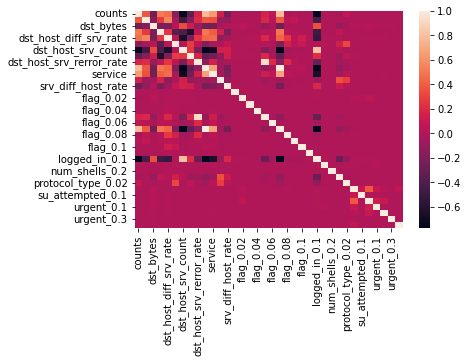

In [343]:
sns.heatmap(data_multi.corr())

In [344]:
X_new_multi=data_multi[data_multi.columns.difference(['attack_class'])]

In [345]:
target_multi = data_multi[['attack_class']]
features_multi = X_new_multi

In [346]:
train_y_multi, test_y_multi, train_X_multi, test_X_multi = train_test_split(target_multi,features_multi, test_size=0.3, random_state=123)

In [347]:
train_multi, test_multi = train_test_split(data_multi, test_size=0.3, random_state=123)

In [348]:
model_reg = LogisticRegression()
model_reg.fit(train_X_multi, train_y_multi)

LogisticRegression()

In [349]:
y_pred_train=model_reg.predict(train_X_multi)

In [350]:
y_pred_test=model_reg.predict(test_X_multi)

In [351]:
print(metrics.classification_report( train_y_multi, y_pred_train))

              precision    recall  f1-score   support

         DOS       0.99      1.00      1.00    161445
       Probe       0.96      0.74      0.84      6662
         R2L       0.00      0.00      0.00        42
         U2R       1.00      0.04      0.07        27
      normal       1.00      1.00      1.00    404109

    accuracy                           1.00    572285
   macro avg       0.79      0.56      0.58    572285
weighted avg       1.00      1.00      1.00    572285



In [352]:
print(metrics.classification_report( test_y_multi, y_pred_test))

              precision    recall  f1-score   support

         DOS       0.99      1.00      1.00     68790
       Probe       0.96      0.74      0.83      2875
         R2L       0.00      0.00      0.00        19
         U2R       0.00      0.00      0.00        13
      normal       1.00      1.00      1.00    173569

    accuracy                           1.00    245266
   macro avg       0.59      0.55      0.57    245266
weighted avg       1.00      1.00      1.00    245266



In [353]:
#Random Forest Classifier


In [354]:
model_RF=RandomForestClassifier()


In [355]:
model_RF.fit(train_X_multi, train_y_multi)

RandomForestClassifier()

In [356]:
y_pred_train_RF=model_RF.predict(train_X_multi)

In [357]:
y_pred_test_RF=model_RF.predict(test_X_multi)

In [358]:
print(metrics.classification_report( train_y_multi, y_pred_train_RF))

              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00    161445
       Probe       1.00      1.00      1.00      6662
         R2L       1.00      1.00      1.00        42
         U2R       1.00      1.00      1.00        27
      normal       1.00      1.00      1.00    404109

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



In [359]:
print(metrics.classification_report( test_y_multi, y_pred_test_RF))

              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     68790
       Probe       1.00      0.99      1.00      2875
         R2L       1.00      0.89      0.94        19
         U2R       0.43      0.23      0.30        13
      normal       1.00      1.00      1.00    173569

    accuracy                           1.00    245266
   macro avg       0.88      0.82      0.85    245266
weighted avg       1.00      1.00      1.00    245266



In [360]:
#Accuracy Metrics

In [361]:
train_gini = 2*metrics.roc_auc_score(train['attack_type_1'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['attack_type_1'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['attack_type_1'], result.predict(train))
test_auc = metrics.roc_auc_score(test['attack_type_1'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.9933391909877183
The Gini Index for the model built on the Test Data is :  0.9940849577936353
The AUC for the model built on the Train Data is :  0.9966695954938591
The AUC for the model built on the Test Data is :  0.9970424788968176


In [362]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['attack_type_1']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head(10)

,actual,prob
469744,0,0.000123
175477,0,0.000734
414161,0,0.011292
53326,0,0.006911
40899,0,0.000260
200894,1,0.364818
401735,0,0.000245
117213,1,1.000000
409567,0,0.000308
56515,0,0.001713


In [363]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['attack_type_1']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
38650,0,0.015656
342382,0,0.024261
166496,1,1.000000
347169,0,0.000320
542177,0,0.008832


In [364]:
#finding the best cutoff to convert probabilities into categorical output
#method-1 : percentage of 1's Y variable
cut_off = train.attack_type_1.mean()
cut_off

0.2947202879684073

In [365]:
#calculate the sensivity and specifivity
result.predict(train)>0.1

469744    False
175477    False
414161    False
53326     False
40899     False
          ...  
130910    False
152224     True
117861     True
206956    False
76838     False
Length: 572285, dtype: bool

In [366]:
train_actual=train_predict.actual
train_predicted_prob=train_predict.prob

In [369]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1,50):
    TP = np.where(((train_actual==1) & (np.where(train_predicted_prob>cut_off,1,0)==1)),1,0)
    TN = np.where(((train_actual==0) & (np.where(train_predicted_prob>cut_off,1,0)==0)),1,0)
    FP = np.where(((train_actual==0) & (np.where(train_predicted_prob>cut_off,1,0)==1)),1,0)
    FN = np.where(((train_actual==1) & (np.where(train_predicted_prob>cut_off,1,0)==0)),1,0)
                  
    sensitivity = TP.sum()/(TP.sum() + FN.sum())
    specificity = TN.sum()/(TN.sum()+FP.sum())
    total = sensitivity + specificity
    accuracy = (TP.sum()+ TN.sum())/(TP.sum()+TN.sum()+FP.sum()+FN.sum())
     
    temp = pd.DataFrame([cut_off,sensitivity,specificity,total,accuracy]).T
    roc_df = pd.concat([roc_df,temp],axis=0)

In [370]:
temp

,0,1,2,3,4
0,1.0,0.0,1.0,1.0,0.70528


In [371]:
roc_df.columns = ['cut_off','sensitivity','specificity','total','accuracy']
roc_df.sort_values(by='total',ascending = False)

,cut_off,sensitivity,specificity,total,accuracy
0,0.306122,0.983144,0.990370,1.973514,0.988240
0,0.326531,0.982444,0.991036,1.973481,0.988504
0,0.285714,0.983826,0.989584,1.973410,0.987887
0,0.346939,0.981774,0.991581,1.973356,0.988691
0,0.265306,0.984496,0.988826,1.973322,0.987550
0,0.367347,0.980962,0.992181,1.973143,0.988874
0,0.244898,0.985083,0.988023,1.973106,0.987157
0,0.387755,0.980079,0.992686,1.972765,0.988971
0,0.224490,0.985634,0.987045,1.972679,0.986629
0,0.408163,0.979243,0.993011,1.972254,0.988953


In [372]:
cut_off = roc_df.sort_values(by='total',ascending=False).head(1)['cut_off'][0]
cut_off 

0.3061224489795918

In [385]:
#now we need to predict the values
train['pred_prob'] = result.predict(train)
test['pred_prob'] = result.predict(test)

In [386]:
train['pred'] = np.where(train.pred_prob>cut_off,1,0)
test['pred'] = np.where(test.pred_prob>cut_off,1,0)

In [388]:
train

,counts,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,...,su_attempted_1,su_attempted_2,urgent_1,urgent_2,urgent_3,urgent_5,protocol_type_1,protocol_type_2,pred_prob,pred
469744,0.014,0.000,0.00552,0.062,0.000,0.002,0.255,0.003,0.0,0.001,...,0,0,0,0,0,0,0,0,0.000123,0
175477,0.004,0.000,0.01042,0.096,0.000,0.001,0.255,0.002,0.0,0.000,...,0,0,0,0,0,0,0,0,0.000734,0
414161,0.013,0.000,0.01821,0.255,0.000,0.000,0.255,0.000,0.0,0.000,...,0,0,0,0,0,0,0,0,0.011292,0
53326,0.029,0.000,0.00354,0.255,0.000,0.000,0.255,0.000,0.0,0.000,...,0,0,0,0,0,0,0,0,0.006911,0
40899,0.001,0.000,0.00092,0.002,0.000,0.100,0.227,0.001,0.0,0.000,...,0,0,0,0,0,0,1,0,0.000260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130910,0.040,0.000,0.00817,0.255,0.000,0.000,0.255,0.000,0.0,0.000,...,0,0,0,0,0,0,0,0,0.004679,0
152224,0.240,0.006,0.00000,0.255,0.006,0.000,0.016,0.000,0.0,0.100,...,0,0,0,0,0,0,0,0,1.000000,1
117861,0.273,0.006,0.00000,0.255,0.007,0.000,0.008,0.000,0.0,0.100,...,0,0,0,0,0,0,0,0,1.000000,1
206956,0.020,0.000,0.00413,0.104,0.000,0.001,0.255,0.003,0.0,0.000,...,0,0,0,0,0,0,0,0,0.000063,0


In [389]:
train[['attack_type_1','pred']]

,attack_type_1,pred
469744,0,0
175477,0,0
414161,0,0
53326,0,0
40899,0,0
...,...,...
130910,0,0
152224,1,1
117861,1,1
206956,0,0


In [390]:
test[['attack_type_1','pred']]

,attack_type_1,pred
38650,0,0
342382,0,0
166496,1,1
347169,0,0
542177,0,0
...,...,...
180379,0,0
353492,0,0
288397,0,0
510993,0,0


In [391]:
#now calculate sensitivity,specificivity
print(metrics.classification_report(train.attack_type_1,train.pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    403621
           1       0.98      0.98      0.98    168664

    accuracy                           0.99    572285
   macro avg       0.99      0.99      0.99    572285
weighted avg       0.99      0.99      0.99    572285



In [382]:
#now calculate sensitivity,specificivity
print(metrics.classification_report(test.attack_type_1,test.pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    173089
           1       0.98      0.98      0.98     72177

    accuracy                           0.99    245266
   macro avg       0.99      0.99      0.99    245266
weighted avg       0.99      0.99      0.99    245266

